# Abalation study of using Multi-graphs in GCN network

This notebook describes the findings of performing an ablation study on the multi graphs used. In the TensorGCN paper, the authors proposed to include sequential, syntactic and semantic information to build the text graphs. This study will look at how removal of certain graphs impact the model performance and computational efficiency. More importantly. it aim to address the question of how much graphs can you sacrifice at the expense of model performance to compensate for computational improvements.

In [1]:
import os
import pickle as pkl
import pandas as pd
from typing import Tuple

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from utility import *

Set seaborn styling

In [3]:
# Set style and palette
sns.set(style="darkgrid")
palette = sns.color_palette("colorblind")

###  Load results for using semantic graph only

In [4]:
sem_epoch_time, sem_loss_res, sem_acc_res = load_all_results(run_id='run_2024-04-15_21-44-44')
sem_df, sem_df_melted = concat_and_melt(sem_epoch_time, sem_loss_res, sem_acc_res)
sem_df

,epoch,train_loss,valid_loss,test_loss,train_acc,valid_acc,test_acc,epoch_time
0,1,2.079442,2.079442,2.079441,0.033826,0.041971,0.037003,9.047323
1,2,2.079442,2.079442,2.079441,0.033826,0.041971,0.037003,9.254713
2,3,2.079442,2.079442,2.079441,0.033826,0.041971,0.037003,9.242840
3,4,2.079442,2.079442,2.079441,0.033826,0.041971,0.037003,8.790813
4,5,2.079442,2.079442,2.079441,0.033826,0.041971,0.037003,8.837750
...,...,...,...,...,...,...,...,...
95,96,2.079442,2.079442,2.079441,0.033826,0.041971,0.037003,8.663064
96,97,2.079442,2.079442,2.079441,0.033826,0.041971,0.037003,8.847453
97,98,2.079442,2.079442,2.079441,0.033826,0.041971,0.037003,8.489929
98,99,2.079442,2.079442,2.079441,0.033826,0.041971,0.037003,8.789842


###  Load results for using syntactic graph only

In [5]:
syn_epoch_time, syn_loss_res, syn_acc_res = load_all_results(run_id='run_2024-04-16_21-18-34')
syn_df, syn_df_melted = concat_and_melt(syn_epoch_time, syn_loss_res, syn_acc_res)
syn_df

,epoch,train_loss,valid_loss,test_loss,train_acc,valid_acc,test_acc,epoch_time
0,1,2.079442,2.079442,2.079441,0.033826,0.041971,0.037003,2.146856
1,2,2.079442,2.079442,2.079441,0.033826,0.041971,0.037003,2.020424
2,3,2.079442,2.079442,2.079441,0.033826,0.041971,0.037003,2.874824
3,4,2.079442,2.079442,2.079441,0.033826,0.041971,0.037003,1.724147
4,5,2.079442,2.079442,2.079441,0.033826,0.041971,0.037003,2.206620
...,...,...,...,...,...,...,...,...
95,96,2.079442,2.079442,2.079441,0.033826,0.041971,0.037003,1.648792
96,97,2.079442,2.079442,2.079441,0.033826,0.041971,0.037003,1.836132
97,98,2.079442,2.079442,2.079441,0.033826,0.041971,0.037003,1.564632
98,99,2.079442,2.079442,2.079441,0.033826,0.041971,0.037003,1.816482


###  Load results for using sequential graph only

In [6]:
seq_epoch_time, seq_loss_res, seq_acc_res = load_all_results(run_id='run_2024-04-16_21-10-37')
seq_df, seq_df_melted = concat_and_melt(seq_epoch_time, seq_loss_res, seq_acc_res)
seq_df

,epoch,train_loss,valid_loss,test_loss,train_acc,valid_acc,test_acc,epoch_time
0,1,2.079442,2.079442,2.079441,0.033826,0.041971,0.037003,4.968875
1,2,2.079442,2.079442,2.079441,0.033826,0.041971,0.037003,4.348026
2,3,2.079442,2.079442,2.079441,0.033826,0.041971,0.037003,4.214593
3,4,2.079442,2.079442,2.079441,0.033826,0.041971,0.037003,4.186741
4,5,2.079442,2.079442,2.079441,0.033826,0.041971,0.037003,4.678706
...,...,...,...,...,...,...,...,...
95,96,2.079442,2.079442,2.079441,0.033826,0.041971,0.037003,4.426666
96,97,2.079442,2.079442,2.079441,0.033826,0.041971,0.037003,4.430957
97,98,2.079442,2.079442,2.079441,0.033826,0.041971,0.037003,4.733253
98,99,2.079442,2.079442,2.079441,0.033826,0.041971,0.037003,5.132939


### Loading results for using syntactic and semantic graphs

In [7]:
syn_sem_epoch_time, syn_sem_loss_res, syn_sem_acc_res = load_all_results(run_id='run_2024-04-15_22-27-01')
syn_sem_df, syn_sem_df_melted = concat_and_melt(syn_sem_epoch_time, syn_sem_loss_res, syn_sem_acc_res)
syn_sem_df

,epoch,train_loss,valid_loss,test_loss,train_acc,valid_acc,test_acc,epoch_time
0,1,94.966156,34.843273,31.775135,0.029573,0.016423,0.014162,10.135149
1,2,112.991409,32.738007,29.634668,0.029573,0.020073,0.016446,10.362381
2,3,109.640442,30.379599,27.205544,0.027952,0.025547,0.019187,9.944739
3,4,114.686050,27.962410,24.750786,0.048815,0.027372,0.021014,9.927530
4,5,86.819244,25.913599,22.714893,0.045777,0.027372,0.024212,9.771237
...,...,...,...,...,...,...,...,...
95,96,27.734495,6.825626,5.466686,0.481669,0.746350,0.779351,10.259003
96,97,24.355036,6.889785,5.498079,0.573628,0.746350,0.779351,9.823929
97,98,27.797791,6.990500,5.559147,0.626899,0.746350,0.778894,9.972252
98,99,26.202797,7.100259,5.635002,0.533928,0.744526,0.777524,10.258729


### Loading results for using sequential and syntactic graphs

In [8]:
seq_syn_epoch_time, seq_syn_loss_res, seq_syn_acc_res = load_all_results(run_id='run_2024-04-15_22-49-40')
seq_syn_df, seq_syn_df_melted = concat_and_melt(seq_syn_epoch_time, seq_syn_loss_res, seq_syn_acc_res)
seq_syn_df

,epoch,train_loss,valid_loss,test_loss,train_acc,valid_acc,test_acc,epoch_time
0,1,102.543129,42.019913,36.700630,0.032813,0.023723,0.022841,4.791734
1,2,122.876579,39.402740,34.226421,0.032003,0.023723,0.023755,4.566189
2,3,118.428177,36.091110,31.135521,0.027345,0.025547,0.024212,4.650071
3,4,120.196587,32.436630,27.683701,0.051448,0.031022,0.028780,4.658377
4,5,95.036911,29.154408,24.555071,0.040308,0.031022,0.030608,4.744694
...,...,...,...,...,...,...,...,...
95,96,24.658154,5.431325,4.691389,0.552765,0.790146,0.830973,4.610597
96,97,20.768686,5.481126,4.710956,0.625481,0.790146,0.830516,4.506745
97,98,21.154276,5.559734,4.760643,0.650192,0.788321,0.830973,4.612454
98,99,23.246134,5.659345,4.838267,0.581325,0.786496,0.830059,4.541862


### Loading results for using sequential and semantic graphs

In [9]:
seq_sem_epoch_time, seq_sem_loss_res, seq_sem_acc_res = load_all_results(run_id='run_2024-04-15_23-05-41')
seq_sem_df, seq_sem_df_melted = concat_and_melt(seq_sem_epoch_time, seq_sem_loss_res, seq_sem_acc_res)
seq_sem_df

,epoch,train_loss,valid_loss,test_loss,train_acc,valid_acc,test_acc,epoch_time
0,1,102.531227,41.988747,36.665066,0.032813,0.023723,0.022841,12.949885
1,2,122.872482,39.369110,34.187805,0.032003,0.023723,0.023755,12.135598
2,3,118.423706,36.054962,31.095865,0.027345,0.025547,0.024212,12.431151
3,4,120.188744,32.400509,27.647982,0.051246,0.031022,0.028780,12.086700
4,5,95.068497,29.122961,24.526869,0.040308,0.031022,0.030608,11.879891
...,...,...,...,...,...,...,...,...
95,96,24.648268,5.431356,4.694410,0.552360,0.790146,0.830973,12.763901
96,97,20.769041,5.481643,4.714341,0.625684,0.791971,0.830516,12.151614
97,98,21.158390,5.560832,4.764594,0.650192,0.790146,0.830973,12.286022
98,99,23.238434,5.660663,4.842509,0.581325,0.788321,0.830059,12.471701


###  Load results for using all 3 graphs

In [10]:
all_epoch_time, all_loss_res, all_acc_res = load_all_results(run_id='run_2024-04-15_22-00-33')
all_df, all_df_melted = concat_and_melt(all_epoch_time, all_loss_res, all_acc_res)
all_df

,epoch,train_loss,valid_loss,test_loss,train_acc,valid_acc,test_acc,epoch_time
0,1,327.602570,89.168716,76.754906,0.227669,0.335766,0.391503,14.257477
1,2,289.198120,76.013344,66.366028,0.253595,0.385037,0.494746,13.332460
2,3,179.950150,66.269196,59.690792,0.355884,0.454380,0.590681,13.292447
3,4,298.370178,61.113346,56.605663,0.157180,0.541971,0.621288,13.694450
4,5,295.582977,58.315422,55.602196,0.243265,0.556569,0.610324,13.429436
...,...,...,...,...,...,...,...,...
95,96,56.921474,9.866419,7.673521,0.671258,0.793796,0.833714,13.949212
96,97,65.645775,9.750563,7.538405,0.650192,0.797445,0.837368,14.072217
97,98,62.907543,9.713522,7.499421,0.660523,0.797445,0.838282,14.016346
98,99,50.472240,9.642203,7.426474,0.725137,0.797445,0.838282,14.666731


### Comparing test loss results

<Axes: xlabel='epoch', ylabel='value'>

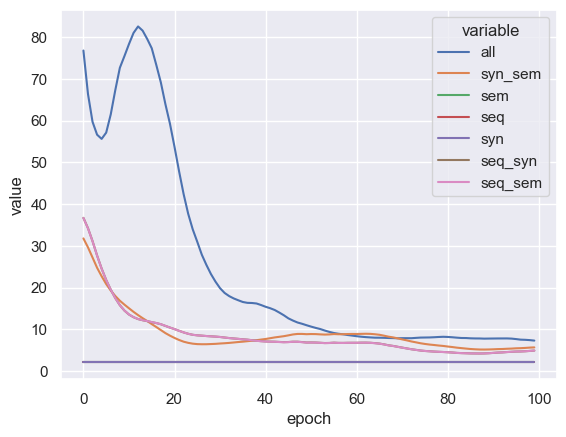

In [11]:
loss_res_df = pd.concat(
    [all_loss_res.test_loss, 
     syn_sem_loss_res.test_loss, 
     sem_loss_res.test_loss,
     seq_loss_res.test_loss,
     syn_loss_res.test_loss,
     seq_syn_loss_res.test_loss,
     seq_sem_loss_res.test_loss
     ],axis=1).reset_index()
loss_res_df.columns = ['epoch','all','syn_sem','sem','seq','syn','seq_syn','seq_sem']
loss_res_df_melted = loss_res_df.melt(id_vars='epoch')

sns.lineplot(data=loss_res_df_melted, x='epoch',y='value',hue='variable')

### Comparing test accuracy results

<Axes: xlabel='epoch', ylabel='value'>

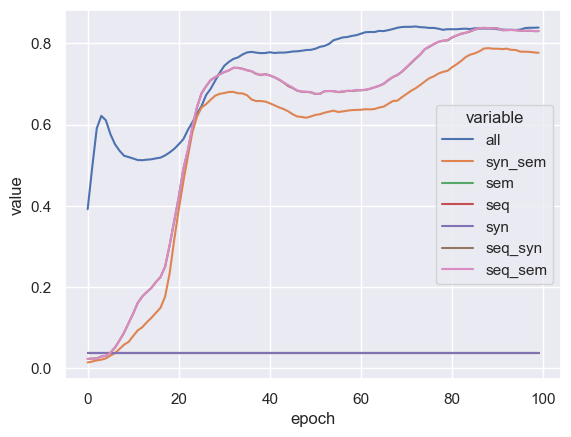

In [12]:
acc_res_df = pd.concat(
    [all_acc_res.test_acc, 
     syn_sem_acc_res.test_acc, 
     sem_acc_res.test_acc,
     seq_acc_res.test_acc,
     syn_acc_res.test_acc,
     seq_syn_acc_res.test_acc,
     seq_sem_acc_res.test_acc
     ],axis=1).reset_index()
acc_res_df.columns = ['epoch','all','syn_sem','sem','seq','syn','seq_syn','seq_sem']
acc_res_df_melted = acc_res_df.melt(id_vars='epoch')

sns.lineplot(data=acc_res_df_melted, x='epoch',y='value',hue='variable')

In [13]:
acc_res_df

,epoch,all,syn_sem,sem,seq,syn,seq_syn,seq_sem
0,0,0.391503,0.014162,0.037003,0.037003,0.037003,0.022841,0.022841
1,1,0.494746,0.016446,0.037003,0.037003,0.037003,0.023755,0.023755
2,2,0.590681,0.019187,0.037003,0.037003,0.037003,0.024212,0.024212
3,3,0.621288,0.021014,0.037003,0.037003,0.037003,0.028780,0.028780
4,4,0.610324,0.024212,0.037003,0.037003,0.037003,0.030608,0.030608
...,...,...,...,...,...,...,...,...
95,95,0.833714,0.779351,0.037003,0.037003,0.037003,0.830973,0.830973
96,96,0.837368,0.779351,0.037003,0.037003,0.037003,0.830516,0.830516
97,97,0.838282,0.778894,0.037003,0.037003,0.037003,0.830973,0.830973
98,98,0.838282,0.777524,0.037003,0.037003,0.037003,0.830059,0.830059


In [14]:
final_acc_res_df = acc_res_df.drop(['epoch','sem','syn','seq'],axis=1).iloc[-1,:].reset_index()
final_acc_res_df.columns = ['graph_combi','acc']
final_acc_res_df = final_acc_res_df.sort_values(by=['acc'],ascending=False)

/var/folders/g4/mj9t8ccd7bn74b0c25x8xjth0000gn/T/ipykernel_93072/381097209.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  acc_barplot = sns.barplot(data=final_acc_res_df,x='graph_combi',y='acc', palette=palette)
/var/folders/g4/mj9t8ccd7bn74b0c25x8xjth0000gn/T/ipykernel_93072/381097209.py:7: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  acc_barplot = sns.barplot(data=final_acc_res_df,x='graph_combi',y='acc', palette=palette)


[Text(0.5, 0, 'Graph Combinations'), Text(0, 0.5, '')]

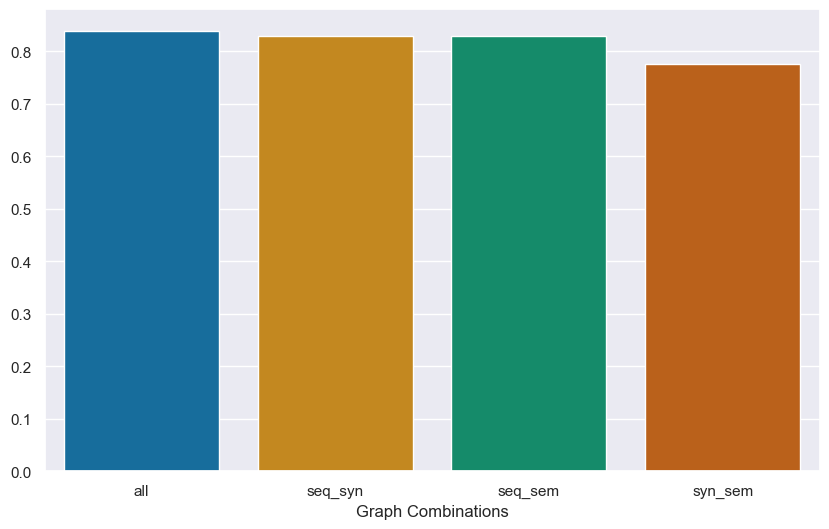

In [15]:
# mean_acc_df = compute_mean(acc_res_df,'mean_acc')

# Adjust figure size
plt.figure(figsize=(10, 6))

# Create the barplot
acc_barplot = sns.barplot(data=final_acc_res_df,x='graph_combi',y='acc', palette=palette)

# Set labels for x and y axes
acc_barplot.set(xlabel='Graph Combinations',ylabel='')

Looking across the test loss and accuracy metrics, TensorGCN requires a minimal of 2 graphs to train the GCN model.

### Comparing epoch run times

<Axes: xlabel='epoch', ylabel='value'>

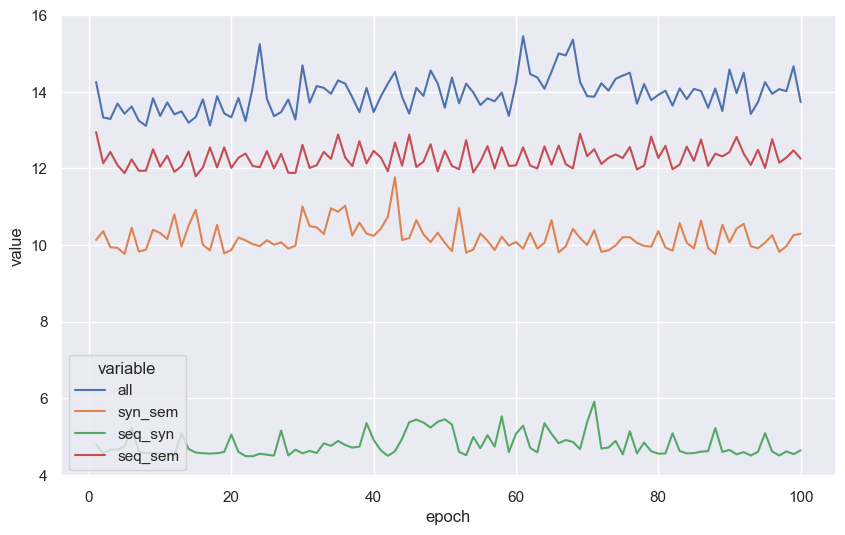

In [16]:
epoch_time_df = pd.concat([
    pd.DataFrame(all_epoch_time, columns=['epoch_time']).rename(columns={'epoch_time':'all'}),
    pd.DataFrame(syn_sem_epoch_time, columns=['epoch_time']).rename(columns={'epoch_time':'syn_sem'}),
    pd.DataFrame(seq_syn_epoch_time, columns=['epoch_time']).rename(columns={'epoch_time':'seq_syn'}),
    pd.DataFrame(seq_sem_epoch_time, columns=['epoch_time']).rename(columns={'epoch_time':'seq_sem'})
    ],
    axis=1
).reset_index().rename(columns={'index':'epoch'})
epoch_time_df['epoch'] = epoch_time_df['epoch'] + 1

epoch_time_df_melted = epoch_time_df.melt(id_vars='epoch')

# Adjust figure size
plt.figure(figsize=(10, 6))
sns.lineplot(data=epoch_time_df_melted, x='epoch',y='value',hue='variable')

/var/folders/g4/mj9t8ccd7bn74b0c25x8xjth0000gn/T/ipykernel_93072/2682583041.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  epoch_time_barplot = sns.barplot(data=mean_epoch_time,x='graph_combi',y='mean_epoch_time', palette=palette)
/var/folders/g4/mj9t8ccd7bn74b0c25x8xjth0000gn/T/ipykernel_93072/2682583041.py:8: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  epoch_time_barplot = sns.barplot(data=mean_epoch_time,x='graph_combi',y='mean_epoch_time', palette=palette)


[Text(0.5, 0, 'Graph Combinations'), Text(0, 0.5, 'Execution Time (Seconds)')]

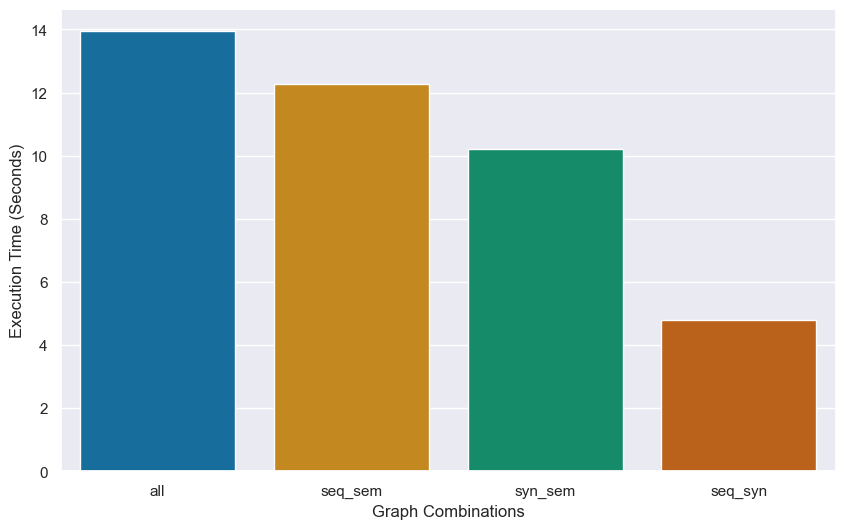

In [18]:
mean_epoch_time = pd.DataFrame(epoch_time_df.drop(['epoch'],axis=1).mean()).reset_index().sort_values(by=0,ascending=False)
mean_epoch_time.columns = ['graph_combi','mean_epoch_time']

# Adjust figure size
plt.figure(figsize=(10, 6))

# Create the barplot
epoch_time_barplot = sns.barplot(data=mean_epoch_time,x='graph_combi',y='mean_epoch_time', palette=palette)

# Set labels for x and y axes
epoch_time_barplot.set(xlabel='Graph Combinations',ylabel='Execution Time (Seconds)')


## Summary of Findings

- Using only 1 graph does not lead to any improvement in loss and accuracy metrics
- Semantic graphs is computionally more intensive than syntactic and sequential graphs

## Ablation study for mr and R8 dataset using 300 Epochs

### Dataset: R8

In [56]:
r8_run_id_list = ['run_2024-04-25_12-14-24','run_2024-04-25_18-20-20','run_2024-04-25_19-37-31','run_2024-04-25_20-09-38']
r8_graph_combi_list = ['all','seq_sem','seq_syn','syn_sem']

r8_df = merge_dataset_runs(r8_run_id_list, r8_graph_combi_list)
r8_df

,epoch,train_loss,valid_loss,test_loss,train_acc,valid_acc,test_acc,epoch_time,graph_combi
0,1,426.382599,147.810959,127.183197,0.045169,0.083942,0.108269,16.827284,all
1,2,356.003998,127.706024,109.884758,0.128823,0.147810,0.233897,16.494719,all
2,3,293.256958,109.889183,95.607048,0.204983,0.266423,0.386935,17.404761,all
3,4,366.069275,96.667534,85.037842,0.118493,0.388686,0.476016,16.842598,all
4,5,410.966675,86.879555,77.465523,0.057525,0.467153,0.529009,16.834623,all
...,...,...,...,...,...,...,...,...,...
295,296,9.877022,3.750416,3.064743,0.773952,0.841241,0.865692,12.986156,syn_sem
296,297,10.750477,3.762917,3.074501,0.725542,0.839416,0.865692,12.600533,syn_sem
297,298,11.309671,3.767917,3.078965,0.763217,0.837591,0.866606,12.968240,syn_sem
298,299,9.294011,3.780945,3.090085,0.773547,0.839416,0.867062,12.603392,syn_sem


### Dataset: mr

In [55]:
mr_run_id_list = ['run_2024-04-25_14-01-36','run_2024-04-25_16-39-37','run_2024-04-25_17-06-33','run_2024-04-25_16-19-42']
mr_graph_combi_list = ['all','seq_sem','seq_syn','syn_sem']

mr_df = merge_dataset_runs(mr_run_id_list, mr_graph_combi_list)
mr_df

,epoch,train_loss,valid_loss,test_loss,train_acc,valid_acc,test_acc,epoch_time,graph_combi
0,1,6.886900,1.673443,1.693800,0.511254,0.516901,0.500281,6.286206,all
1,2,7.294771,1.323325,1.358352,0.484995,0.511268,0.499719,5.918281,all
2,3,6.434597,1.159448,1.195919,0.510316,0.529577,0.494091,5.700595,all
3,4,6.603918,1.043788,1.081378,0.498906,0.526761,0.494935,5.598704,all
4,5,7.321310,0.932846,0.972018,0.494842,0.523944,0.490152,5.780369,all
...,...,...,...,...,...,...,...,...,...
295,296,1.100616,0.633027,0.636908,0.572679,0.676056,0.671638,2.943207,syn_sem
296,297,1.049048,0.627064,0.630533,0.560488,0.674648,0.674451,3.013349,syn_sem
297,298,0.943769,0.623393,0.626502,0.570022,0.667606,0.675858,3.034359,syn_sem
298,299,1.068391,0.622172,0.625137,0.548453,0.666197,0.676984,3.038414,syn_sem


### Mean Epoch Time

In [40]:
def plot_mean_epoch_time(df_list: list[pd.DataFrame], dataset_list: list[str], savefig:bool=False) -> pd.DataFrame:
    """
    Compute the mean epoch time for each dataset and plot them.

    Parameters:
    - df_list (List[pd.DataFrame]): List of DataFrames containing epoch time data for each dataset.
    - dataset_list (List[str]): List of dataset names.

    Returns:
    - pd.DataFrame: DataFrame containing mean epoch time for each dataset.
    """
    epoch_df_list = []  # List to store mean epoch time DataFrames for each dataset
    for df, dataset in zip(df_list, dataset_list):
        # Compute mean epoch time for the current dataset
        mean_epoch_df = compute_epoch_mean(df)
        
        # Add a new column 'dataset' to identify the dataset
        mean_epoch_df['dataset'] = dataset
        
        # Append the mean epoch time DataFrame to the list
        epoch_df_list.append(mean_epoch_df)

    # Concatenate all mean epoch time DataFrames into a single DataFrame
    epoch_df = pd.concat(epoch_df_list)

    mean_epoch_barplot = sns.barplot(data=epoch_df.melt(id_vars=['dataset','graph_combi']), x='dataset',y='value',hue='graph_combi',palette=palette)
    mean_epoch_barplot.set(
        title='Barplots of mean epoch time across the datasets',
        xlabel='Dataset',
        ylabel='Execution Time (Seconds)'
    )

    if savefig:
        plt.savefig("../assets/results/mean_epoch_time_barplot.png")

    return mean_epoch_barplot, epoch_df

/var/folders/g4/mj9t8ccd7bn74b0c25x8xjth0000gn/T/ipykernel_93072/3272236220.py:26: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  mean_epoch_barplot = sns.barplot(data=epoch_df.melt(id_vars=['dataset','graph_combi']), x='dataset',y='value',hue='graph_combi',palette=palette)


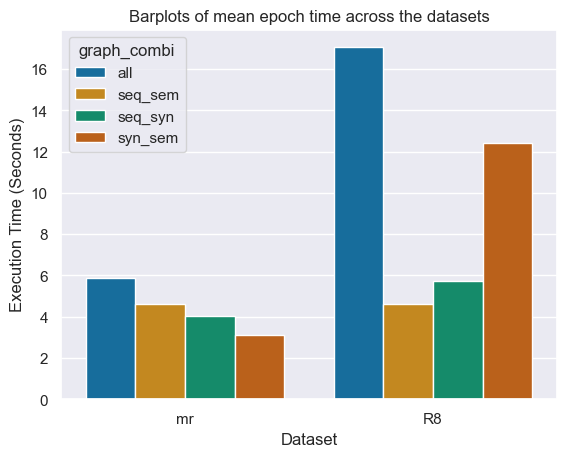

In [41]:
mean_epoch_barplot, epoch_df = plot_mean_epoch_time([mr_df,r8_df],['mr','R8'],savefig=True)

In [42]:
epoch_df

,graph_combi,epoch_time,dataset
0,all,5.890052,mr
1,seq_sem,4.613080,mr
2,seq_syn,4.015860,mr
3,syn_sem,3.132385,mr
0,all,17.064575,R8
3,syn_sem,12.422095,R8
2,seq_syn,5.712729,R8
1,seq_sem,4.613080,R8


### Test Acc

In [57]:
# numbers are obtained from logs
test_acc = {
    'mr': {
        "All": 0.70568,
        "SeqSyn": 0.68655,
        "SeqSem": 0.68796,
        "SynSem": 0.67755
    },  
    'R8': {
        "All": 0.90635,
        "SeqSyn": 0.87072,
        "SeqSem": 0.87072,
        "SynSem": 0.86569
    }
}

In [47]:
mr_df.loc[mr_df['epoch']==300][['test_acc','graph_combi']]

,test_acc,graph_combi
299,0.705684,all
299,0.687957,seq_sem
299,0.686550,seq_syn
299,0.677546,syn_sem


In [50]:
def compute_test_acc(df_list: list[pd.DataFrame], dataset_list: list[str]) -> pd.DataFrame:
    epoch_df_list = []  # List to store mean epoch time DataFrames for each dataset
    for df, dataset in zip(df_list,dataset_list):
        # Compute mean epoch time for the current dataset
        final_epoch_df = df.loc[mr_df['epoch']==300][['test_acc','graph_combi']]
        
        # Add a new column 'dataset' to identify the dataset
        final_epoch_df['dataset'] = dataset
        
        # Append the mean epoch time DataFrame to the list
        epoch_df_list.append(final_epoch_df)

    # Concatenate all mean epoch time DataFrames into a single DataFrame
    epoch_df = pd.concat(epoch_df_list)
    return epoch_df

In [54]:
epoch_df = compute_test_acc([mr_df,r8_df],['mr','R8'])
epoch_df

,test_acc,graph_combi,dataset
299,0.705684,all,mr
299,0.687957,seq_sem,mr
299,0.686550,seq_syn,mr
299,0.677546,syn_sem,mr
299,0.906350,all,R8
299,0.687957,seq_sem,R8
299,0.870717,seq_syn,R8
299,0.865692,syn_sem,R8


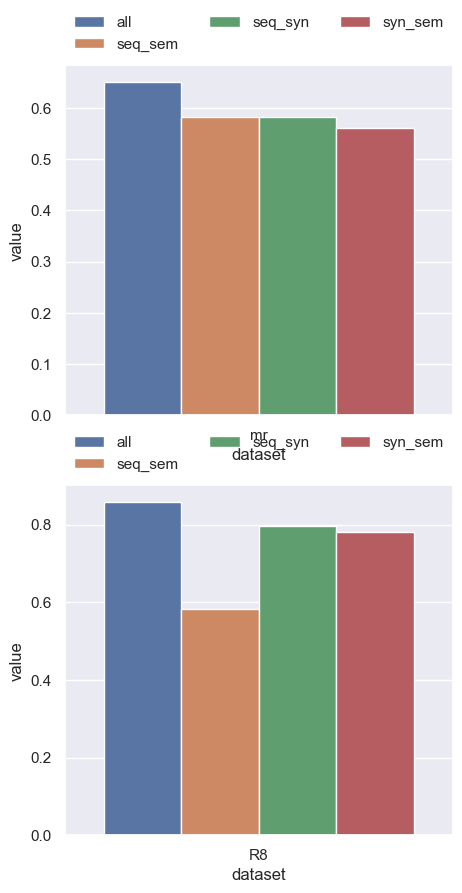

In [53]:
def plot_final_epoch_metric(df_list: list[pd.DataFrame], dataset_list: list[str]) -> pd.DataFrame:
    """
    Compute the mean epoch time for each dataset and plot them.

    Parameters:
    - df_list (List[pd.DataFrame]): List of DataFrames containing epoch time data for each dataset.
    - dataset_list (List[str]): List of dataset names.

    Returns:
    - pd.DataFrame: DataFrame containing mean epoch time for each dataset.
    """
    # epoch_df_list = []  # List to store mean epoch time DataFrames for each dataset

    fig, ax = plt.subplots(len(df_list),1,figsize=(5,10))
    for i, (df, dataset) in enumerate(zip(df_list, dataset_list)):
        # Compute mean epoch time for the current dataset
        final_epoch_df = df.loc[df['epoch'] == 100][['graph_combi', 'test_acc']].reset_index(drop=True)

        # Add a new column 'dataset' to identify the dataset
        final_epoch_df['dataset'] = dataset

        # Append the mean epoch time DataFrame to the list
        # epoch_df_list.append(final_epoch_df)

    # Concatenate all mean epoch time DataFrames into a single DataFrame
    # epoch_df = pd.concat(epoch_df_list)

        sns.barplot(data=final_epoch_df.melt(id_vars=['dataset','graph_combi']), x='dataset',y='value',hue='graph_combi', ax=ax[i])
        sns.move_legend(
            ax[i], "lower center",
            bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
        )
        
        mean_epoch_barplot.set(
            title='Barplots of mean epoch time across the datasets',
            xlabel='Dataset',
            ylabel='Execution Time (Seconds)'
        )

    plt.savefig("../assets/results/final_acc_barplot.png")
    # return final_epoch_metric_barplot

plot_final_epoch_metric([mr_df,r8_df],['mr','R8'])